<a href="https://colab.research.google.com/github/dubalker11/darkmatter/blob/main/Week_2_coding_Ben_Walker_(walker_2487).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#import required packages
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt
import astropy.io.ascii

$v_{orbital} = \sqrt{\frac{GM_{sun}}{r}}$

In [43]:
ac.G.si #gravitational constant

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [44]:
v_orbital = np.sqrt(ac.G * u.solMass / u.au) #orbital velocity of the Earth around the Sun
v_orbital.si.to(u.km / u.s) #convert to kilometers per second

<Quantity 29.78469183 km / s>

In [45]:
v_orb = np.sqrt(ac.G * u.earthMass/u.earthRad) #orbital velocity of a satellite around the Earth
v_orb.si.to(u.km / u.s) #convert to kilometers per second

<Quantity 7.90538823 km / s>

In [46]:
r_blackhole = ((2 * ac.G) * u.solMass) / ac.c**2 #the Schwarzschild radius of a solar-mass blackhole
r_blackhole.si.to(u.km) #convert to kilometers

<Quantity 2.95325008 km>

In [47]:
from google.colab import files
upload = files.upload() #upload file from computer

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (1).txt


In [48]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") #read the file and name is as tab
tab

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


$v = \sqrt{\frac{GM}{r}}$

In [49]:
def calculate_orbital_velocity(mass, radius): #define a function using mass and radius as inputs
  return(np.sqrt(ac.G * mass / radius)) #return the calculated orbital velocity for given values of mass and radius

In [50]:
#calculate the orbital velocity of the Earth using the function above
mass = u.earthMass #mass of the Earth
radius = u.earthRad #radius of the Earth
orb_vel = calculate_orbital_velocity(mass, radius) #orbital velocity of the Earth
print(orb_vel.to(u.km / u.s)) #convert to kilometers per second

7.905388234385281 km / s


In [51]:
#calculate the orbital velocity given the mass and radius below
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s)) #convert to kilometers per second

4.766142291386287 km / s


In [53]:
dis = tab['col2'] #column 2 array has been named "dis"
vel = tab['col3'] #column 3 array has been named "vel"
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s # create a velocity array with the same number as elements as the distance array

for i, radius in enumerate(dis): #create for loop to calculate orbital velocity for each row of data
  rad = radius * 1000 * u.parsec #convert the radius
  orb_vel = calculate_orbital_velocity(mass, rad) #function defined above
  vel_bh[i] = orb_vel #store velocity for each observation i
  print("The orbital velocity at", radius, "kpc = ", orb_vel.to(u.km / u.s)) #print orbital velocity for each given radius

The orbital velocity at 5.68 kpc =  4.766142291386287 km / s
The orbital velocity at 6.81 kpc =  4.352789004155528 km / s
The orbital velocity at 7.95 kpc =  4.028632086788635 km / s
The orbital velocity at 9.08 kpc =  3.7696258549122557 km / s
The orbital velocity at 10.22 kpc =  3.5531678501224344 km / s
The orbital velocity at 11.35 kpc =  3.3716558645298256 km / s
The orbital velocity at 12.49 kpc =  3.214104201911268 km / s
The orbital velocity at 13.62 kpc =  3.077886621912613 km / s
The orbital velocity at 14.76 kpc =  2.956636901678396 km / s
The orbital velocity at 15.89 kpc =  2.8495692993877366 km / s
The orbital velocity at 17.03 kpc =  2.7525413240352865 km / s
The orbital velocity at 18.16 kpc =  2.6655280045445924 km / s
The orbital velocity at 19.3 kpc =  2.585607014258112 km / s
The orbital velocity at 20.43 kpc =  2.513083903274837 km / s
The orbital velocity at 21.45 kpc =  2.4526045154369367 km / s
The orbital velocity at 22.47 kpc =  2.396291435442096 km / s
The or

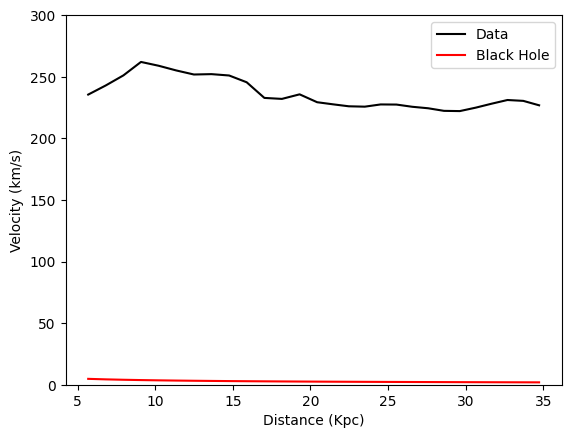

In [54]:
plt.plot(dis, vel, color = "black", label = "Data") #plot the velocity against the distance in black
plt.plot(dis, vel_bh.value, color = "red", label = "Black Hole") #plot the black hole velocity against the distance in red
plt.xlabel("Distance (Kpc)") #create x-label
plt.ylabel("Velocity (km/s)") #create y-label
plt.ylim(0, 300) #minimum y-value = 0 and maximum y-value = 300
plt.legend() #create legend